In [1]:
pwd

u'/data/dv/Imaging/qingge/qingge-code'

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
ls

a.out*                   compute_int_samples.pyc      list-frompy.dat.saved
be2.py~                  compute_int_samples_v0.py*   List.txt
be.py~*                  diff-BE-int_samples.py*      Load.m
BraggEdge.for            diff-BE-int_samples.py~*     MTEX
BraggEdge.for.debug      expected-int_samples.dat     README.md
calculate R.ipynb        expected-int_samples_v0.dat  RHistogram.for
compare-be-res.py~       export_VPSC1.m               VULCAN2MTEX.FOR
compute_int_samples.py*  int_samples.dat              xqg.tex


# Read outputs from compute_int_samples.py

In [4]:
samples = np.loadtxt('./int_samples.dat')

In [5]:
# samples[:10]

format:

```
  (hkl_index+1, number_of_good_grains, polar_angle_index+1, azimuthal_angle_index+1, 0???, wavelength)
```

In [6]:
hkl_indices = samples[:, 0]
counts = samples[:, 1]
polar_indices = samples[:, 2]
azimuthal_indices = samples[:, 3]
lambdas = samples[:, -1]

### Verify input data and reformat

In [7]:
Npolar = np.max(polar_indices)
assert Npolar == int(Npolar)
Npolar = int(Npolar)

In [8]:
Nazimuthal = np.max(azimuthal_indices)
assert Nazimuthal == int(Nazimuthal)
Nazimuthal = int(Nazimuthal)

In [9]:
nhkl = np.max(hkl_indices)
assert nhkl == int(nhkl)
nhkl = int(nhkl)

In [10]:
ncols = samples.size/(nhkl*Npolar*Nazimuthal)

In [11]:
print nhkl, Npolar, Nazimuthal, ncols, samples.size

19 37 144 6 607392


In [12]:
assert nhkl*Npolar*Nazimuthal*ncols == samples.size

In [13]:
lambdas.shape = counts.shape = nhkl, Npolar, Nazimuthal

In [14]:
# wave length does not depend on azimuthal angle
lambdas1 = lambdas[:, :, 0]
for i in range(Nazimuthal):
    assert (lambdas[:, :, i] == lambdas1).all()
lambdas = lambdas1

# for each hkl, normalize counts
```
      do n=1,13,1
      tmp=0.0
      do i=1, 37, 1
      do k=1,144,1
      tmp=tmp+real(ddata(i,k,n))
      enddo
      enddo
      tmp=tmp/144.0/37.0
c                                                                                                                                                                                                             
      do i=1, 37, 1
      do k=1,144,1
      dnorm(i,k,n)=real(ddata(i,k,n))/tmp
```

In [15]:
norm_counts = np.zeros(counts.shape, dtype=float)

In [16]:
for i in range(nhkl):
    ave = np.average(counts[i])
    norm_counts[i, :] = counts[i] / ave

# Calculate R as a function of polar angle and hkl
```
C  calculate the R factor for the limited number of Lameda                                                                                                                                                    
      R=0.0
      do n=1, 13, 1
      do i=1, 37, 1
c                                                                                                                                                                                                             
      do k=1, 144, 1
      R(i,n)=R(i,n)+dnorm(i,k,n)
      enddo
c                                                                                                                                                                                                             
      R(i,n)=R(i,n)/144.0
c      write(*,*) R(1,n)                                                                                                                                                                                      
      enddo
      enddo

```

In [17]:
R = np.average(norm_counts, axis=-1)
assert R.shape == (nhkl, Npolar)

# Plot R vs $\lambda$ for each hkl

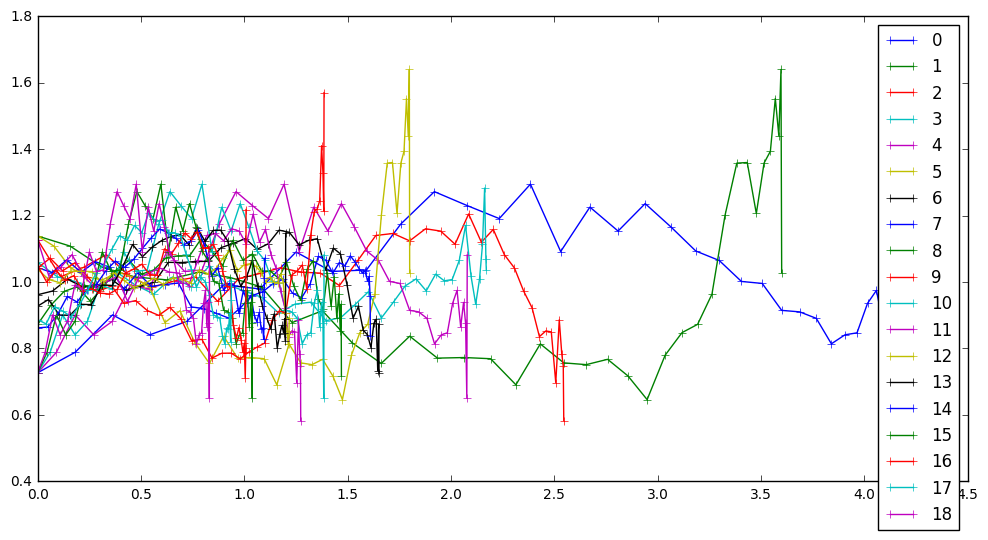

In [18]:
plt.figure(figsize=(12, 6))
for i in range(nhkl):
    plt.plot(lambdas[i], R[i], '+-', label=i)
plt.legend()